# Multi-layered Neural Network MPL 

In [1]:
# Imports :
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import time
import numpy as np

* Dowloanding the MNIST dataset :

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

* Randomise data & target :


In [3]:
indices = np.random.randint(70000, size=70000)
data = mnist.data[indices]
target = mnist.target[indices]

* data spliting :

In [4]:
xtrain, xtest, ytrain, ytest =train_test_split(data, target, train_size=49000)

* MLP with one Hidden Layer of 50 neurals :

In [5]:
clf = MLPClassifier(hidden_layer_sizes=(50))

clf.fit(xtrain, ytrain)
prediction = clf.predict(xtest)
score = clf.score(xtest, ytest)
recall = metrics.recall_score(ytest, prediction, average = 'macro')
precision = metrics.precision_score(ytest, prediction, average ='macro')
loss0_1 = metrics.zero_one_loss(ytest, prediction)

> N.B :
***
 - for average = macro, we have : <br />
        - Score = (TP + TN)/(TP+TN+FP+FN) <br />
        - Précision = TP/(TP + FP)<br />
        - Recall = TP/(TP+FN)<br />
        - Zero one loss : standard loss function in classification (equivalent of squared error for regression)
 - for average = micro, it is the same thing.

* Test for the 4 image (prints):

This MLP model, with one layer of 50, has a score of :  96.86190476190475 %.
4th image : Prediction  3 Vs  Reel :  3


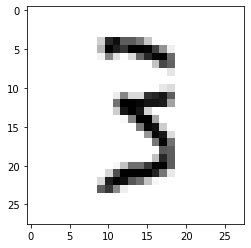

This MLP model has a precision of : 96.89259237993865 %.
This MLP model has a recall of :  96.82576373252246 %.
This MLP model has a zero-one_loss of : 96.82576373252246 %.


In [6]:
print("This MLP model, with one layer of 50, has a score of : ", score*100, "%.")
print("4th image : Prediction ",prediction[3], "Vs  Reel : ", ytest[3])

# Showing the 4th predicted image:

images = xtest.reshape((-1, 28, 28))
plt.imshow(images[3],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()


# Metrics :
print ("This MLP model has a precision of :", precision*100, "%.")
print ("This MLP model has a recall of : ",recall*100, "%.")
print ("This MLP model has a zero-one_loss of :",recall*100, "%.")

* Variation of layers number from 2 to 100 :


In [7]:
hidden_layer =(50,)*100

ScoreResult = []
PredResult = []
RecallResult = []
LossResult = []
#print(hidden_layer)
#print(hidden_layer[0:1])

for i in range (100):
    clf = MLPClassifier(hidden_layer_sizes = hidden_layer[0:i])
    clf.fit(xtrain, ytrain)
    prediction = clf.predict(xtest)
    score = clf.score(xtest, ytest)
    precision = metrics.precision_score(ytest, prediction, average='macro')
    recall = metrics.recall_score(ytest, prediction, average='macro')
    loss0_1 = metrics.zero_one_loss(ytest, prediction)

    ScoreResult.append(score)
    PredResult.append(precision)
    RecallResult.append(recall)
    LossResult.append(loss0_1)

    print("For ", i, "hidden layer (s), The score = ", score *100, "%", ", Precision = ", precision*100, "% .." )





For  0 hidden layer (s), The score =  90.39047619047619 % , Precision =  90.56956237697442 % ..
For  1 hidden layer (s), The score =  96.55238095238096 % , Precision =  96.55607105478579 % ..
For  2 hidden layer (s), The score =  97.56190476190476 % , Precision =  97.55711700782454 % ..
For  3 hidden layer (s), The score =  97.71904761904761 % , Precision =  97.70299820311159 % ..
For  4 hidden layer (s), The score =  97.82380952380953 % , Precision =  97.79773211437677 % ..
For  5 hidden layer (s), The score =  97.83809523809524 % , Precision =  97.82022131319493 % ..
For  6 hidden layer (s), The score =  97.90476190476191 % , Precision =  97.90791505727236 % ..
For  7 hidden layer (s), The score =  97.76666666666667 % , Precision =  97.77281120556115 % ..
For  8 hidden layer (s), The score =  98.19047619047619 % , Precision =  98.18351011869521 % ..
For  9 hidden layer (s), The score =  97.96666666666667 % , Precision =  97.95790248368213 % ..
For  10 hidden layer (s), The score =  9

/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  48 hidden layer (s), The score =  10.604761904761904 % , Precision =  1.0604761904761906 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  49 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  50 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  51 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..
For  52 hidden layer (s), The score =  87.29047619047618 % , Precision =  87.44863710451831 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  53 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  54 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  55 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  56 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  57 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  58 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  59 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  60 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  61 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  62 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  63 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  64 hidden layer (s), The score =  10.604761904761904 % , Precision =  1.0604761904761906 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  65 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  66 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  67 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  68 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  69 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  70 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  71 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  72 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  73 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  74 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  75 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  76 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  77 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  78 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  79 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  80 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  81 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  82 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  83 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  84 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  85 hidden layer (s), The score =  10.604761904761904 % , Precision =  1.0604761904761906 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  86 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  87 hidden layer (s), The score =  10.604761904761904 % , Precision =  1.0604761904761906 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  88 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  89 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  90 hidden layer (s), The score =  10.604761904761904 % , Precision =  1.0604761904761906 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  91 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  92 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  93 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  94 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  95 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  96 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  97 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  98 hidden layer (s), The score =  11.219047619047618 % , Precision =  1.1219047619047617 % ..
For  99 hidden layer (s), The score =  10.604761904761904 % , Precision =  1.0604761904761906 % ..


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> Priting this results :

In [8]:
print(ScoreResult)
print("\n")
print(PredResult)
print("\n")
print(RecallResult)
print("\n")
print(LossResult)

[0.9039047619047619, 0.9655238095238096, 0.9756190476190476, 0.9771904761904762, 0.9782380952380952, 0.9783809523809524, 0.979047619047619, 0.9776666666666667, 0.981904761904762, 0.9796666666666667, 0.98, 0.9825238095238096, 0.9831428571428571, 0.98, 0.9814285714285714, 0.9788095238095238, 0.9821904761904762, 0.9817619047619047, 0.9838571428571429, 0.9833333333333333, 0.9831904761904762, 0.9799523809523809, 0.9790952380952381, 0.9803333333333333, 0.981904761904762, 0.9661904761904762, 0.9738571428571429, 0.9603333333333334, 0.9689047619047619, 0.9419047619047619, 0.9375238095238095, 0.9524285714285714, 0.9001428571428571, 0.9388095238095238, 0.9328095238095238, 0.926952380952381, 0.8800476190476191, 0.7612380952380953, 0.9114761904761904, 0.8935238095238095, 0.7004285714285714, 0.7163809523809523, 0.9032380952380953, 0.8335238095238096, 0.7601428571428571, 0.5981904761904762, 0.7006190476190476, 0.621904761904762, 0.10604761904761904, 0.11219047619047619, 0.11219047619047619, 0.1121904

> Visualizing this results :

Text(0, 0.5, 'Zero-to-one Loss')

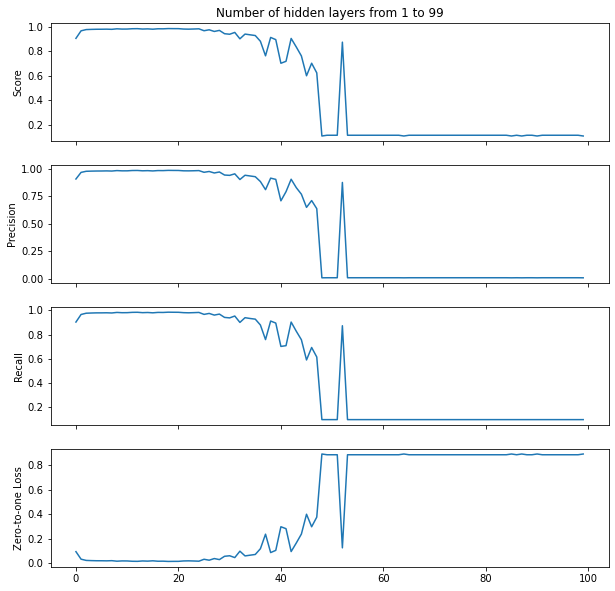

In [20]:
import matplotlib.pyplot as plt


fig, axarr = plt.subplots(4, sharex=True, figsize=(10,10))
axarr[0].plot(range(100), ScoreResult)
axarr[0].set_title('Number of hidden layers from 1 to 99')
axarr[0].set_ylabel('Score')
axarr[1].plot(range(100), PredResult)
axarr[1].set_ylabel('Precision')
axarr[2].plot(range(100), RecallResult)
axarr[2].set_ylabel('Recall')
axarr[3].plot(range(100), LossResult)
axarr[3].set_ylabel('Zero-to-one Loss')


* 5 MLP MNIST Models : 

> With 1 to 100 layers and 10 to 300 neurals !!

> Here we choice randomly our clf :

In [6]:
# 1 layer, max neurals
clf1 = MLPClassifier(hidden_layer_sizes=(300))
# 3 layers, random neurals
clf3 = MLPClassifier(hidden_layer_sizes=(20, 200, 50))
# 5 layers, gaussien neurals
clf5 = MLPClassifier(hidden_layer_sizes=(50, 100, 200, 100, 50))
# 7 layers, desincrease neurals :
clf7 = MLPClassifier(hidden_layer_sizes=(300, 250, 200, 150, 100, 50, 10))
# 9 layers, increase neurals :
clf9 = MLPClassifier(hidden_layer_sizes=(30, 60, 90, 120, 150, 180, 210, 240, 270))


In [7]:
ClassifierList = ("clf1", "clf3","clf5", "clf7", "clf9")

Score =[]
Precision = []
Recall = []
Loss = []
TimeTraining = []
TimePrediction = []

def runClfs(clf, i):

    #Training :
    startTrain =time.time()
    clf.fit(xtrain, ytrain)
    endTrain = time.time()

    #Prediction :
    startpred= time.time()
    predict = clf.predict(xtest)
    endpred = time.time()

    #Metrics :
    score = clf.score(xtest,ytest)
    precision =  metrics.precision_score(ytest, predict,  average='macro')
    recall = metrics.recall_score(ytest, predict, average ='macro')
    loss01 = metrics.zero_one_loss(ytest, predict)
    timetrain = endTrain - startTrain
    timePred = endpred - startpred

    #Saving results
    Score.append(score*100)
    Precision.append(precision*100)
    Recall.append(recall)
    Loss.append(loss01)
    TimePrediction.append(timePred)
    TimeTraining.append(timetrain)

    #Prints :
    print("For the", i," model we have, score = ", score*100, "%, precision =",precision*100, "%." )
    print("   Training's time = ", timetrain, "(s) and prediction's time = ", timePred, "(s)." )
    



In [8]:
# Testing :
runClfs(clf1, 1)


For the 1  model we have, score =  98.27142857142857 %, precision = 98.2800387237163 %.
   Training's time =  596.970538854599 (s) and prediction's time =  1.4182140827178955 (s).


In [9]:
runClfs(clf3, 2)


For the 2  model we have, score =  96.78571428571429 %, precision = 96.80309677945303 %.
   Training's time =  244.33201575279236 (s) and prediction's time =  0.501004695892334 (s).


In [10]:
runClfs(clf5, 3)


For the 3  model we have, score =  97.87142857142858 %, precision = 97.91080931964906 %.
   Training's time =  423.84654569625854 (s) and prediction's time =  4.104665279388428 (s).


In [11]:
runClfs(clf7, 4)


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For the 4  model we have, score =  11.39047619047619 %, precision = 1.139047619047619 %.
   Training's time =  286.1396396160126 (s) and prediction's time =  9.410271644592285 (s).


In [12]:
runClfs(clf9, 5)

For the 5  model we have, score =  97.59523809523809 %, precision = 97.60245345251924 %.
   Training's time =  605.3296127319336 (s) and prediction's time =  6.029844760894775 (s).


> showing thne results :

In [13]:
print(Score)
print(Precision)
print(Recall)
print(Loss)
print(TimeTraining)
print(TimePrediction)

[98.27142857142857, 96.78571428571429, 97.87142857142858, 11.39047619047619, 97.59523809523809]
[98.2800387237163, 96.80309677945303, 97.91080931964906, 1.139047619047619, 97.60245345251924]
[0.9825327101383717, 0.9675008748193447, 0.9783504241995302, 0.1, 0.97576464277639]
[0.017285714285714238, 0.03214285714285714, 0.02128571428571424, 0.886095238095238, 0.024047619047619095]
[596.970538854599, 244.33201575279236, 423.84654569625854, 286.1396396160126, 605.3296127319336]
[1.4182140827178955, 0.501004695892334, 4.104665279388428, 9.410271644592285, 6.029844760894775]


> Visualizing this results :

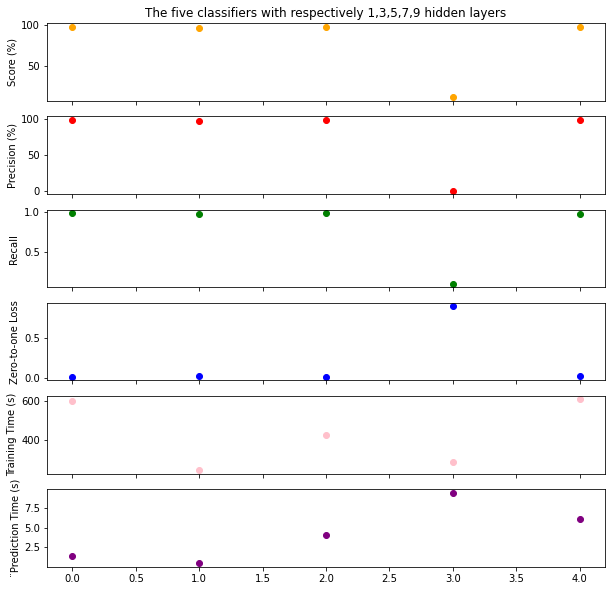

In [16]:
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(6, sharex=True, figsize=(10,10))
axarr[0].scatter(range(5), Score, c='orange')
axarr[0].set_title('The five classifiers with respectively 1,3,5,7,9 hidden layers')
axarr[0].set_ylabel('Score (%)')
axarr[1].scatter(range(5), Precision, c='red')
axarr[1].set_ylabel('Precision (%)')
axarr[2].scatter(range(5), Recall, c='green')
axarr[2].set_ylabel('Recall ')
axarr[3].scatter(range(5), Loss, c='blue')
axarr[3].set_ylabel('Zero-to-one Loss')
axarr[4].scatter(range(5), TimeTraining, c='pink')
axarr[4].set_ylabel('Training Time (s)')
axarr[5].scatter(range(5), TimePrediction, c='purple')
axarr[5].set_ylabel('¨Prediction Time (s)')

plt.show()

* Study the convergence of the available optimization algorithms: `L-BFGS`, `SGD` and `Adam` 

> LBFGS :  an optimizer in the family of quasi-Newton methods.. <br />
> SGD : stochastic gradient descent.. <br />
> ADAM : a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba..

In [5]:
# Our tuples (<==> i layer(s) with a random number of neurals) :
t1 = (30)
t3 = (20, 200, 50)
t5 = (50, 100, 200, 100, 50)
t7 = (300, 250, 200, 150, 100, 50, 10)
t9 = (30, 60, 90, 120, 150, 180, 210, 240, 270)

In [18]:
TotalScore          = []
TotalPrecision      = []
TotalRecall         = []
TotalLoss           = []
TotalTrainingTime   = []
TotalPredictionTime = []

In [19]:
def trySolver(tuple, solv, i):

    #Training :
    clf = MLPClassifier(hidden_layer_sizes = tuple, solver = solv)
    start1 = time.time()
    clf.fit(xtrain, ytrain)
    end1 = time.time()

    #Prediction :
    start2 = time.time()
    prediction = clf.predict(xtest)
    end2 = time.time()

    #Metrics :
    score = clf.score(xtest, ytest)
    precision = metrics.precision_score(ytest, prediction, average = 'macro')
    recall = metrics.zero_one_loss(ytest, prediction)
    loss0_1 = metrics.zero_one_loss(ytest, prediction)

    trainingTime = end1 - start1
    predictionTime = end2 - start2

    #Saving reults :
    TotalScore.append(score)
    TotalPrecision.append(precision)
    TotalRecall.append(recall)
    TotalLoss.append(loss0_1)
    TotalTrainingTime.append(trainingTime)
    TotalPredictionTime.append(predictionTime)

    # Printing results :
    print("For the Solver :: ", solv)
    print("for the ", i, "model we have, a score = ", score * 100, "%, precision = ", precision * 100, "%, training's time = ", trainingTime, "and a prediction's time = ", predictionTime, " .")
    



> Testing :

In [20]:
for j in ('lbfgs', 'sgd', 'adam'):
    trySolver(t1, j, 1)


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


For the Solver ::  lbfgs
for the  1 model we have, a score =  86.95714285714286 %, precision =  88.07311868633234 %, training's time =  218.7680048942566 and a prediction's time =  12.819177389144897  .


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For the Solver ::  sgd
for the  1 model we have, a score =  50.62857142857143 %, precision =  45.49922100565653 %, training's time =  99.03525137901306 and a prediction's time =  0.1869971752166748  .
For the Solver ::  adam
for the  1 model we have, a score =  95.19047619047619 %, precision =  95.1722243992223 %, training's time =  384.30015778541565 and a prediction's time =  1.4356191158294678  .


In [21]:
for j in ('lbfgs', 'sgd', 'adam'):
    trySolver(t3, j, 2)


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


For the Solver ::  lbfgs
for the  2 model we have, a score =  75.53809523809524 %, precision =  75.19787268070714 %, training's time =  446.4630093574524 and a prediction's time =  29.79080891609192  .


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For the Solver ::  sgd
for the  2 model we have, a score =  94.57142857142857 %, precision =  94.51118196036758 %, training's time =  554.7537832260132 and a prediction's time =  8.303427696228027  .
For the Solver ::  adam
for the  2 model we have, a score =  97.01428571428572 %, precision =  97.02755339072355 %, training's time =  296.31069707870483 and a prediction's time =  0.38300061225891113  .


In [22]:
for j in ('lbfgs', 'sgd', 'adam'):
    trySolver(t5, j, 3)


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


For the Solver ::  lbfgs
for the  3 model we have, a score =  97.89047619047619 %, precision =  97.87973592143133 %, training's time =  1634.4662458896637 and a prediction's time =  116.10134959220886  .
For the Solver ::  sgd
for the  3 model we have, a score =  97.26666666666667 %, precision =  97.24696843263503 %, training's time =  616.2729866504669 and a prediction's time =  1.1352427005767822  .
For the Solver ::  adam
for the  3 model we have, a score =  98.22380952380952 %, precision =  98.22562940885007 %, training's time =  343.4446792602539 and a prediction's time =  0.554997444152832  .


In [23]:
for j in ('lbfgs', 'sgd', 'adam'):
    trySolver(t7, j, 4)


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For the Solver ::  lbfgs
for the  4 model we have, a score =  11.39047619047619 %, precision =  1.139047619047619 %, training's time =  172.05368518829346 and a prediction's time =  9.287686824798584  .


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For the Solver ::  sgd
for the  4 model we have, a score =  11.39047619047619 %, precision =  1.139047619047619 %, training's time =  292.0816957950592 and a prediction's time =  7.073765277862549  .
For the Solver ::  adam
for the  4 model we have, a score =  98.54285714285714 %, precision =  98.53580251300315 %, training's time =  1008.9422144889832 and a prediction's time =  2.3116092681884766  .


In [24]:
for j in ('lbfgs', 'sgd', 'adam'):
    trySolver(t9, j, 5)

C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


For the Solver ::  lbfgs
for the  5 model we have, a score =  95.03809523809524 %, precision =  94.98965011044137 %, training's time =  1504.3333435058594 and a prediction's time =  10.102150201797485  .
For the Solver ::  sgd
for the  5 model we have, a score =  97.74285714285715 %, precision =  97.72491829499896 %, training's time =  639.6866199970245 and a prediction's time =  5.12909722328186  .
For the Solver ::  adam
for the  5 model we have, a score =  98.11904761904762 %, precision =  98.11213002626126 %, training's time =  646.9030668735504 and a prediction's time =  1.1405844688415527  .


> Showing this results :

In [25]:
print(TotalScore)
print(TotalPrecision)
print(TotalRecall)
print(TotalLoss)
print(TotalTrainingTime)
print(TotalPredictionTime)

[0.8695714285714286, 0.5062857142857143, 0.9519047619047619, 0.7553809523809524, 0.9457142857142857, 0.9701428571428572, 0.9789047619047619, 0.9726666666666667, 0.9822380952380952, 0.11390476190476191, 0.11390476190476191, 0.9854285714285714, 0.9503809523809523, 0.9774285714285714, 0.9811904761904762]
[0.8807311868633233, 0.4549922100565653, 0.951722243992223, 0.7519787268070713, 0.9451118196036757, 0.9702755339072355, 0.9787973592143133, 0.9724696843263503, 0.9822562940885007, 0.01139047619047619, 0.01139047619047619, 0.9853580251300315, 0.9498965011044138, 0.9772491829499896, 0.9811213002626126]
[0.13042857142857145, 0.49371428571428566, 0.04809523809523808, 0.24461904761904762, 0.05428571428571427, 0.029857142857142804, 0.021095238095238056, 0.02733333333333332, 0.017761904761904757, 0.886095238095238, 0.886095238095238, 0.014571428571428569, 0.049619047619047674, 0.022571428571428576, 0.01880952380952383]
[0.13042857142857145, 0.49371428571428566, 0.04809523809523808, 0.24461904761

* Visualiziing this results :

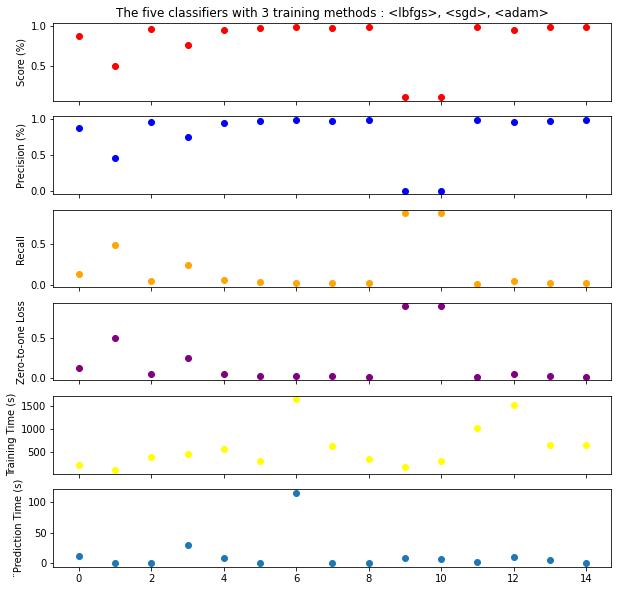

In [26]:
fig, axarr = plt.subplots(6, sharex=True, figsize=(10,10))

axarr[0].scatter(range(15), TotalScore, c='red')
axarr[0].set_title('The five classifiers with 3 training methods : <lbfgs>, <sgd>, <adam>')
axarr[0].set_ylabel('Score (%)')
axarr[1].scatter(range(15), TotalPrecision, c='blue')
axarr[1].set_ylabel('Precision (%)')
axarr[2].scatter(range(15), TotalRecall, c='orange')
axarr[2].set_ylabel('Recall ')
axarr[3].scatter(range(15), TotalRecall, c='purple')
axarr[3].set_ylabel('Zero-to-one Loss')
axarr[4].scatter(range(15), TotalTrainingTime, c='yellow')
axarr[4].set_ylabel('Training Time (s)')
axarr[5].scatter(range(15), TotalPredictionTime)
axarr[5].set_ylabel('¨Prediction Time (s)')

plt.show()

* Variation of the Activation function :

In [6]:
TotalScore2 = []
TotalPrecision2 = []
TotalRecall2 = []
TotalLoss2 = []
TotalTrainingTime2 =[]
TotalPredictionTime2 = []

In [7]:
def trySomeActivationFcts(t, activation ,i) :
    #Training :
    clf = MLPClassifier(hidden_layer_sizes = t, activation = activation)
    start1 = time.time()
    clf.fit(xtrain, ytrain)
    end1= time.time()

    #Prediction :
    start2 = time.time()
    prediction = clf.predict(xtest)
    end2 = time.time()

    #Metrics :
    score = clf.score(xtest, ytest)
    precision = metrics.precision_score(ytest, prediction, average='macro')
    recall = metrics.recall_score(ytest, prediction, average='macro')
    loss0_1 = metrics.zero_one_loss(ytest, prediction)

    trainingT = end1 - start1
    predictionT = end2 - start2

    # Saving the results :
    TotalScore2.append(score)
    TotalPrecision2.append(precision)
    TotalRecall2.append(recall)
    TotalLoss2.append(loss0_1)
    TotalTrainingTime2.append(trainingT)
    TotalPredictionTime2.append(predictionT)

    #Print the results :
    print("For the activation function : ", activation)
    print("for the, ", i, " model, the score = ",score * 100, "%, precision = ", precision * 100, "%, training'time = ", trainingT, "(s) and the prediction's time is = ", predictionT, " (s).")
     


> Testing :

In [8]:
for j in ('identity', 'logistic', 'tanh', 'relu'):
    trySomeActivationFcts(t1, j, 1)

For the activation function :  identity
for the,  1  model, the score =  90.84285714285714 %, precision =  90.95663317002834 %, training'time =  69.79375720024109 (s) and the prediction's time is =  0.29687070846557617  (s).
For the activation function :  logistic
for the,  1  model, the score =  93.6047619047619 %, precision =  93.54905947089796 %, training'time =  233.32597064971924 (s) and the prediction's time is =  0.6720788478851318  (s).
For the activation function :  tanh
for the,  1  model, the score =  92.96190476190476 %, precision =  92.94183418466574 %, training'time =  268.85450887680054 (s) and the prediction's time is =  1.1183788776397705  (s).
For the activation function :  relu
for the,  1  model, the score =  94.57142857142857 %, precision =  94.54914648029093 %, training'time =  226.16475582122803 (s) and the prediction's time is =  0.23858213424682617  (s).


In [9]:
for j in ('identity', 'logistic', 'tanh', 'relu'):
    trySomeActivationFcts(t3, j, 2)

For the activation function :  identity
for the,  2  model, the score =  92.12857142857143 %, precision =  92.14658639303617 %, training'time =  375.2230751514435 (s) and the prediction's time is =  51.321407079696655  (s).
For the activation function :  logistic
for the,  2  model, the score =  93.80952380952381 %, precision =  93.72185393164841 %, training'time =  395.58043146133423 (s) and the prediction's time is =  13.179959774017334  (s).
For the activation function :  tanh
for the,  2  model, the score =  93.26190476190476 %, precision =  93.2025133633571 %, training'time =  351.33014154434204 (s) and the prediction's time is =  16.166006088256836  (s).
For the activation function :  relu
for the,  2  model, the score =  96.35238095238095 %, precision =  96.31946070610665 %, training'time =  494.31905817985535 (s) and the prediction's time is =  1.7457115650177002  (s).


In [10]:

for j in ('identity', 'logistic', 'tanh', 'relu'):
    trySomeActivationFcts(t5, j, 3)

For the activation function :  identity
for the,  3  model, the score =  92.49047619047619 %, precision =  92.41194959466702 %, training'time =  1068.3581264019012 (s) and the prediction's time is =  46.457226037979126  (s).
For the activation function :  logistic
for the,  3  model, the score =  95.46666666666667 %, precision =  95.44119100771731 %, training'time =  911.5650060176849 (s) and the prediction's time is =  4.831017255783081  (s).
For the activation function :  tanh
for the,  3  model, the score =  93.92857142857143 %, precision =  93.87930623490834 %, training'time =  344.3298556804657 (s) and the prediction's time is =  0.7968840599060059  (s).
For the activation function :  relu
for the,  3  model, the score =  97.80952380952381 %, precision =  97.79235400611897 %, training'time =  289.26820278167725 (s) and the prediction's time is =  0.4374983310699463  (s).


In [11]:

for j in ('identity', 'logistic', 'tanh', 'relu'):
    trySomeActivationFcts(t7, j, 4)

For the activation function :  identity
for the,  4  model, the score =  91.65714285714286 %, precision =  91.74757944983602 %, training'time =  2048.189071416855 (s) and the prediction's time is =  8.229941844940186  (s).
For the activation function :  logistic
for the,  4  model, the score =  96.88095238095238 %, precision =  96.8639389624092 %, training'time =  2548.36083483696 (s) and the prediction's time is =  6.650424480438232  (s).
For the activation function :  tanh
for the,  4  model, the score =  95.5 %, precision =  95.51148431270316 %, training'time =  1575.106074333191 (s) and the prediction's time is =  4.56481146812439  (s).


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For the activation function :  relu
for the,  4  model, the score =  11.257142857142858 %, precision =  1.125714285714286 %, training'time =  260.8994679450989 (s) and the prediction's time is =  1.4100444316864014  (s).


In [12]:

for j in ('identity', 'logistic', 'tanh', 'relu'):
    trySomeActivationFcts(t9, j, 5)

For the activation function :  identity
for the,  5  model, the score =  90.64285714285715 %, precision =  90.72053989585577 %, training'time =  242.93140745162964 (s) and the prediction's time is =  0.8535447120666504  (s).


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For the activation function :  logistic
for the,  5  model, the score =  11.257142857142858 %, precision =  1.125714285714286 %, training'time =  194.2609784603119 (s) and the prediction's time is =  1.5091609954833984  (s).
For the activation function :  tanh
for the,  5  model, the score =  93.07142857142857 %, precision =  93.08932512865539 %, training'time =  1186.8149931430817 (s) and the prediction's time is =  3.67378306388855  (s).
For the activation function :  relu
for the,  5  model, the score =  97.93809523809523 %, precision =  97.93652713057469 %, training'time =  747.3771078586578 (s) and the prediction's time is =  0.9957916736602783  (s).


> Showing the results :

In [13]:
print(TotalScore2)
print(TotalPrecision2)
print(TotalRecall2)
print(TotalLoss2)
print(TotalTrainingTime2)
print(TotalPredictionTime2)

[0.9084285714285715, 0.936047619047619, 0.9296190476190476, 0.9457142857142857, 0.9212857142857143, 0.9380952380952381, 0.9326190476190476, 0.9635238095238096, 0.9249047619047619, 0.9546666666666667, 0.9392857142857143, 0.9780952380952381, 0.9165714285714286, 0.9688095238095238, 0.955, 0.11257142857142857, 0.9064285714285715, 0.11257142857142857, 0.9307142857142857, 0.9793809523809524]
[0.9095663317002834, 0.9354905947089796, 0.9294183418466574, 0.9454914648029092, 0.9214658639303617, 0.9372185393164841, 0.932025133633571, 0.9631946070610665, 0.9241194959466702, 0.9544119100771731, 0.9387930623490834, 0.9779235400611898, 0.9174757944983603, 0.9686393896240919, 0.9551148431270317, 0.011257142857142858, 0.9072053989585577, 0.011257142857142858, 0.9308932512865539, 0.9793652713057469]
[0.9072349871521226, 0.935300613826031, 0.9286541279932935, 0.945174375480757, 0.9206813692422232, 0.9376465214891315, 0.9318549271293589, 0.963361496779625, 0.9240376524068802, 0.9542410808326336, 0.9386185

> Visualizing this reults :

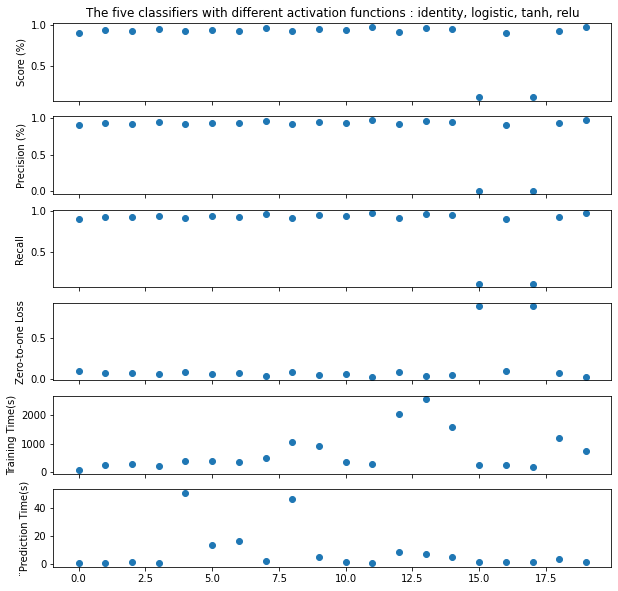

In [14]:
fig, axarr = plt.subplots(6, sharex=True, figsize=(10,10))
axarr[0].scatter(range(20), TotalScore2)
axarr[0].set_title('The five classifiers with different activation functions : identity, logistic, tanh, relu')
axarr[0].set_ylabel('Score (%)')
axarr[1].scatter(range(20), TotalPrecision2)
axarr[1].set_ylabel('Precision (%)')
axarr[2].scatter(range(20), TotalRecall2)
axarr[2].set_ylabel('Recall ')
axarr[3].scatter(range(20), TotalLoss2)
axarr[3].set_ylabel('Zero-to-one Loss')
axarr[4].scatter(range(20), TotalTrainingTime2)
axarr[4].set_ylabel('Training Time(s)')
axarr[5].scatter(range(20), TotalPredictionTime2)
axarr[5].set_ylabel('¨Prediction Time(s)')

plt.show()

* Variation of alpha (Regulisation value L2)

In [15]:
alphas = np.logspace(-5, 3, 5)

FinalScore = []
FinalPrecision = []
FinalRecal = []
FinalLoss = []
FinalTimeTraining = []
FinalTimePrediction = []



In [16]:
def variateAlpha(numTuple, a, i):
    # Train
    clf = MLPClassifier(hidden_layer_sizes=numTuple, alpha= a)
    startTrain =time.time()
    clf.fit(xtrain, ytrain)
    endTrain = time.time()
    # Predict
    startpred= time.time()
    predict = clf.predict(xtest)
    endpred = time.time()
    # Metrics
    score = clf.score(xtest,ytest)
    precision =  metrics.precision_score(ytest, predict,  average='macro')
    recall = metrics.recall_score(ytest, predict, average ='macro')
    loss01 = metrics.zero_one_loss(ytest, predict)
    timetrain = endTrain - startTrain
    timePred = endpred - startpred
    #Append
    FinalScore.append(score*100)
    FinalPrecision.append(precision*100)
    FinalRecal.append(recall)
    FinalLoss.append(loss01)
    FinalTimeTraining.append(timePred)
    FinalTimePrediction.append(timetrain)
    #Print
    print ("ALPHA : ", a)
    print("pour le ", i,"eme modèle, score = ", score*100, "%, précision =",precision*100, "%." )
    print("    temps apprentissage : ", timetrain, "sec , temps prediction = ", timePred, "sec." )

    



In [17]:
for j in alphas:
    variateAlpha(t1, j, 1)


ALPHA :  1e-05
pour le  1 eme modèle, score =  95.16666666666667 %, précision = 95.2291860265325 %.
    temps apprentissage :  128.60655188560486 sec , temps prediction =  0.17199420928955078 sec.
ALPHA :  0.001
pour le  1 eme modèle, score =  95.17142857142858 %, précision = 95.19754387604479 %.
    temps apprentissage :  184.3132643699646 sec , temps prediction =  0.17299890518188477 sec.
ALPHA :  0.1
pour le  1 eme modèle, score =  93.96190476190476 %, précision = 94.00399981012626 %.
    temps apprentissage :  132.14650321006775 sec , temps prediction =  0.17996954917907715 sec.
ALPHA :  10.0
pour le  1 eme modèle, score =  95.5904761904762 %, précision = 95.67070050934839 %.
    temps apprentissage :  57.39375114440918 sec , temps prediction =  0.18099236488342285 sec.
ALPHA :  1000.0
pour le  1 eme modèle, score =  88.82380952380953 %, précision = 89.31685570398147 %.
    temps apprentissage :  21.723164796829224 sec , temps prediction =  0.1759946346282959 sec.


In [18]:
for j in alphas:
    variateAlpha(t3, j, 2)


ALPHA :  1e-05
pour le  2 eme modèle, score =  96.78571428571429 %, précision = 96.79792097046086 %.
    temps apprentissage :  255.08372974395752 sec , temps prediction =  0.30196690559387207 sec.
ALPHA :  0.001
pour le  2 eme modèle, score =  97.13809523809523 %, précision = 97.13904154956417 %.
    temps apprentissage :  272.381600856781 sec , temps prediction =  0.3339955806732178 sec.
ALPHA :  0.1
pour le  2 eme modèle, score =  97.06190476190476 %, précision = 97.0363930346773 %.
    temps apprentissage :  223.45912623405457 sec , temps prediction =  0.31996846199035645 sec.
ALPHA :  10.0
pour le  2 eme modèle, score =  96.07142857142857 %, précision = 96.08852301619075 %.
    temps apprentissage :  152.77145504951477 sec , temps prediction =  0.3059711456298828 sec.
ALPHA :  1000.0
pour le  2 eme modèle, score =  11.257142857142858 %, précision = 1.125714285714286 %.
    temps apprentissage :  34.20952272415161 sec , temps prediction =  0.3429906368255615 sec.


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
for j in alphas:
    variateAlpha(t5, j, 3)


ALPHA :  1e-05
pour le  3 eme modèle, score =  97.91428571428571 %, précision = 97.89371651515653 %.
    temps apprentissage :  178.1393563747406 sec , temps prediction =  0.514998197555542 sec.
ALPHA :  0.001
pour le  3 eme modèle, score =  97.72857142857143 %, précision = 97.72398328766234 %.
    temps apprentissage :  220.72903442382812 sec , temps prediction =  0.514000415802002 sec.
ALPHA :  0.1
pour le  3 eme modèle, score =  98.28571428571429 %, précision = 98.2788248255995 %.
    temps apprentissage :  411.1449201107025 sec , temps prediction =  0.531005859375 sec.
ALPHA :  10.0
pour le  3 eme modèle, score =  95.15238095238095 %, précision = 95.28905463457879 %.
    temps apprentissage :  247.7932357788086 sec , temps prediction =  0.45399928092956543 sec.
ALPHA :  1000.0
pour le  3 eme modèle, score =  11.257142857142858 %, précision = 1.125714285714286 %.
    temps apprentissage :  62.274001359939575 sec , temps prediction =  0.44399476051330566 sec.


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
for j in alphas:
    variateAlpha(t7, j, 4)


ALPHA :  1e-05
pour le  4 eme modèle, score =  98.54761904761905 %, précision = 98.53815885647509 %.
    temps apprentissage :  884.4213554859161 sec , temps prediction =  1.3401672840118408 sec.


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ALPHA :  0.001
pour le  4 eme modèle, score =  11.257142857142858 %, précision = 1.125714285714286 %.
    temps apprentissage :  277.9273748397827 sec , temps prediction =  1.259894609451294 sec.
ALPHA :  0.1
pour le  4 eme modèle, score =  98.33333333333333 %, précision = 98.33372247402176 %.
    temps apprentissage :  2131.6994466781616 sec , temps prediction =  22.344945907592773 sec.
ALPHA :  10.0
pour le  4 eme modèle, score =  95.5952380952381 %, précision = 95.62193664767469 %.
    temps apprentissage :  1558.8684539794922 sec , temps prediction =  1.3201725482940674 sec.


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ALPHA :  1000.0
pour le  4 eme modèle, score =  11.257142857142858 %, précision = 1.125714285714286 %.
    temps apprentissage :  286.6772334575653 sec , temps prediction =  13.880051136016846 sec.


In [21]:
for j in alphas:
    variateAlpha(t9, j, 5)

ALPHA :  1e-05
pour le  5 eme modèle, score =  97.91428571428571 %, précision = 97.90329756189206 %.
    temps apprentissage :  586.5379459857941 sec , temps prediction =  0.9787664413452148 sec.
ALPHA :  0.001
pour le  5 eme modèle, score =  97.85238095238095 %, précision = 97.86078213976255 %.
    temps apprentissage :  721.1207506656647 sec , temps prediction =  9.122885704040527 sec.
ALPHA :  0.1
pour le  5 eme modèle, score =  98.17142857142858 %, précision = 98.16242088600153 %.
    temps apprentissage :  1010.169055223465 sec , temps prediction =  7.543731212615967 sec.
ALPHA :  10.0
pour le  5 eme modèle, score =  95.05238095238096 %, précision = 95.09466861755897 %.
    temps apprentissage :  1442.611584663391 sec , temps prediction =  17.70817279815674 sec.


C:\Users\Said\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ALPHA :  1000.0
pour le  5 eme modèle, score =  11.257142857142858 %, précision = 1.125714285714286 %.
    temps apprentissage :  147.5014669895172 sec , temps prediction =  0.874927282333374 sec.


In [22]:

print(FinalScore)
print(FinalPrecision)
print(FinalRecal)
print(FinalLoss)
print(FinalTimeTraining)
print(FinalTimePrediction)

[95.16666666666667, 95.17142857142858, 93.96190476190476, 95.5904761904762, 88.82380952380953, 96.78571428571429, 97.13809523809523, 97.06190476190476, 96.07142857142857, 11.257142857142858, 97.91428571428571, 97.72857142857143, 98.28571428571429, 95.15238095238095, 11.257142857142858, 98.54761904761905, 11.257142857142858, 98.33333333333333, 95.5952380952381, 11.257142857142858, 97.91428571428571, 97.85238095238095, 98.17142857142858, 95.05238095238096, 11.257142857142858]
[95.2291860265325, 95.19754387604479, 94.00399981012626, 95.67070050934839, 89.31685570398147, 96.79792097046086, 97.13904154956417, 97.0363930346773, 96.08852301619075, 1.125714285714286, 97.89371651515653, 97.72398328766234, 98.2788248255995, 95.28905463457879, 1.125714285714286, 98.53815885647509, 1.125714285714286, 98.33372247402176, 95.62193664767469, 1.125714285714286, 97.90329756189206, 97.86078213976255, 98.16242088600153, 95.09466861755897, 1.125714285714286]
[0.950530562859041, 0.9514691796913715, 0.939286

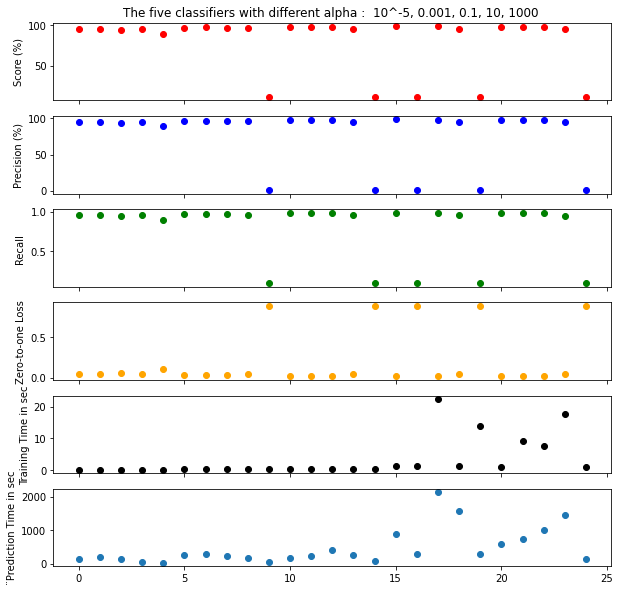

In [25]:

# Clf1 alpha : 10^-5, 0.001, 0.1, 10, 1000 | Clf3 ... | Clf5 ... | Clf7 ... | Clf9 ...

fig, axarr = plt.subplots(6, sharex=True, figsize=(10,10))
axarr[0].scatter(range(25), FinalScore, c='red')
axarr[0].set_title('The five classifiers with different alpha :  10^-5, 0.001, 0.1, 10, 1000 ')
axarr[0].set_ylabel('Score (%)')
axarr[1].scatter(range(25), FinalPrecision, c='blue')
axarr[1].set_ylabel('Precision (%)')
axarr[2].scatter(range(25), FinalRecal, c='green')
axarr[2].set_ylabel('Recall ')
axarr[3].scatter(range(25), FinalLoss, c='orange')
axarr[3].set_ylabel('Zero-to-one Loss')
axarr[4].scatter(range(25), FinalTimeTraining, c='black')
axarr[4].set_ylabel('Training Time in sec')
axarr[5].scatter(range(25), FinalTimePrediction)
axarr[5].set_ylabel('¨Prediction Time in sec')

plt.show()